<center><h1> Uvod u podatkovnu znanost  </h1></center>
<center><h2> Zimski semestar - 2023 </h2></center> 
<center><h3> Lab 5</h3></center> 
<center><h3> </h3></center> 
<center><h3> Vizualizacija podataka 2</h3></center> 

Ovo je vježba o vizualizaciji podataka! Koristit će se uobičajene python biblioteke, Matplotlib i Seaborn za stvaranje učinkovitih i jasnih vizualizacija. Radit ćete na skupu podataka koji sadrži informacije o deset filmova s najvećom zaradom svake godine.

Ovo su vizualizacije koje će se napraviti, a koje ćete koristiti za rješavanje vježbe:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Osim Matplotliba i Searbona, postoji mnogo više resursa koji bi vam mogli biti korisni, na primjer:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) te [Folium](https://python-visualization.github.io/folium/)

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, re
import seaborn as sns

episodes = pd.read_csv('simpsons_episodes.csv')

In [8]:
# extract some datetime variables
episodes['datetime'] = pd.to_datetime(episodes['original_air_date'])
episodes['datetime_year'] = episodes['datetime'].dt.year
episodes['datetime_month'] =episodes['datetime'].dt.month
episodes['datetime_day'] =episodes['datetime'].dt.day
episodes['datetime-MM-DD'] = episodes['datetime'].dt.strftime('%m-%d')

# 1. Tutorial: Korištenje biblioteke za vizualizaciju podataka

Koristit će se dataset blockbustera. Sažetak feature-a:

- *title*: Episode title
- *original_air_date*
- *production_code*
- *season*
- *number_in_season*
- *number_in_series*
- *us_viewers_in_millions*
- *views*
- *imdb_rating*
- *imdb_votes*
- *image_url*
- *video_url*

## Vizualizacija dviju kontinuiranih varijabli

- Je li se smanjivao IMDB rating i US views kroz godine
- Postoji mnogo načina kako se može ispitati odnos između dvije varijable. Najjednostavniji je dijagram scatterplot, koristeći plt.scatterplot()

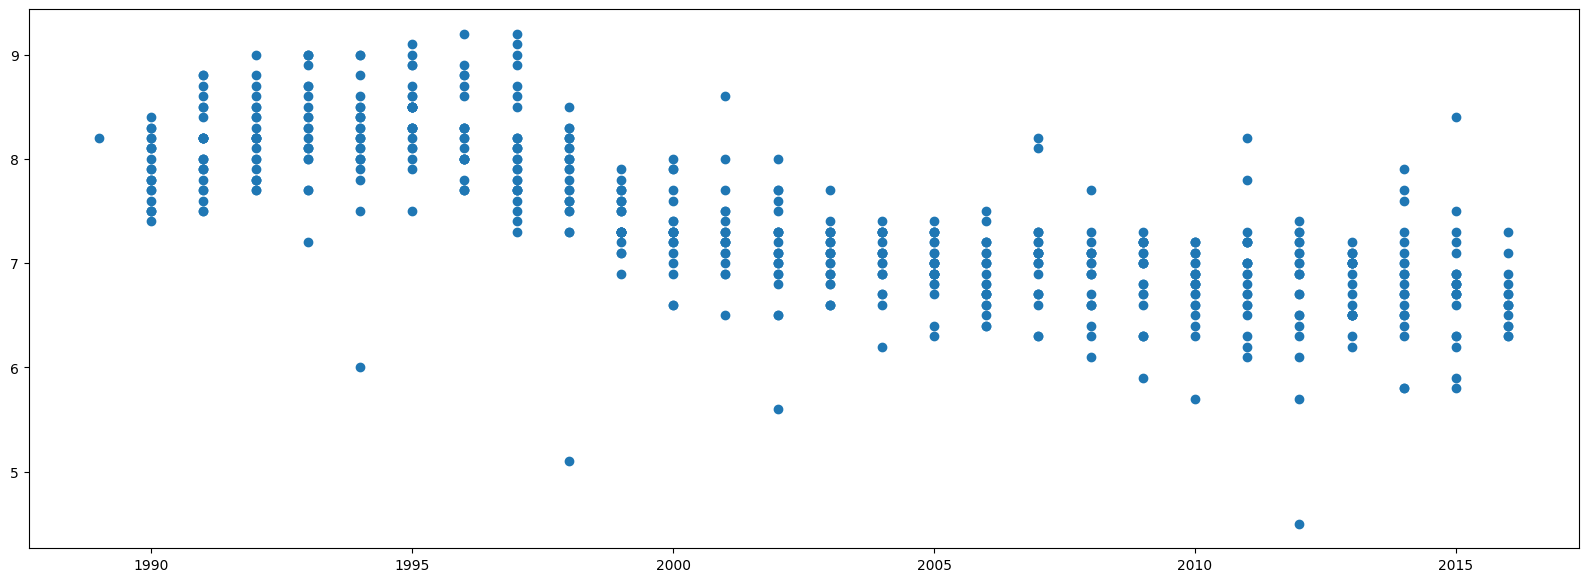

In [9]:
plt.figure(figsize=(20, 7))
plt.scatter(x=episodes['datetime_year'],y=episodes['imdb_rating'])

## Vizualizacija dviju varijabli, kontinuiranih i kategoričkih

- Razmotrimo IMDB rating i US views kroz godine i sezone emitiranja
- Prikazat ćemo barplot, boxplot i violinplot. Seaborn nudi mnogo više uvjerljivih vizualizacija. Bacite oko na primjere: https://seaborn.pydata.org/examples/index.html

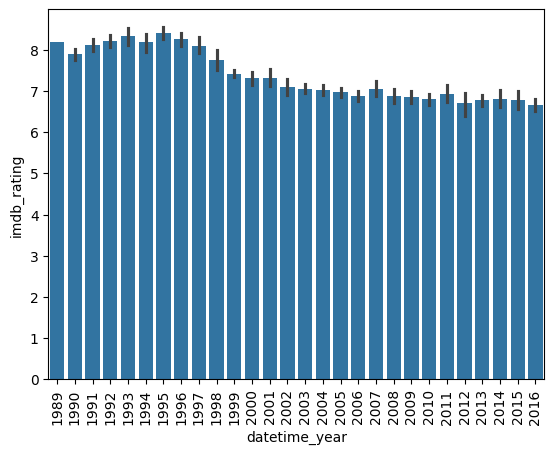

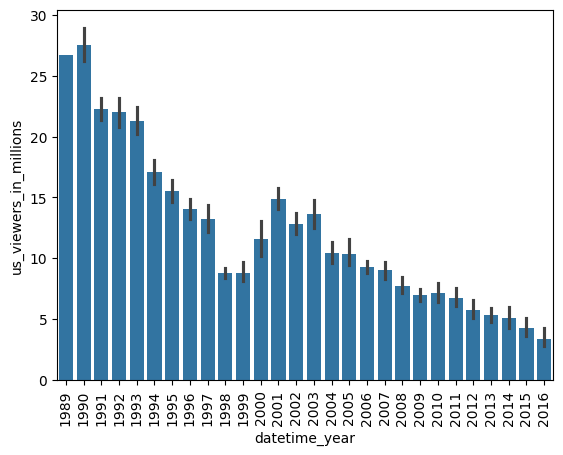

In [10]:
# barplot
sns.barplot(data=episodes,x=episodes['datetime_year'],y=episodes['imdb_rating'])
plt.xticks(rotation=90)
plt.show()
sns.barplot(data=episodes,x=episodes['datetime_year'],y=episodes['us_viewers_in_millions'])
plt.xticks(rotation=90)
plt.show()


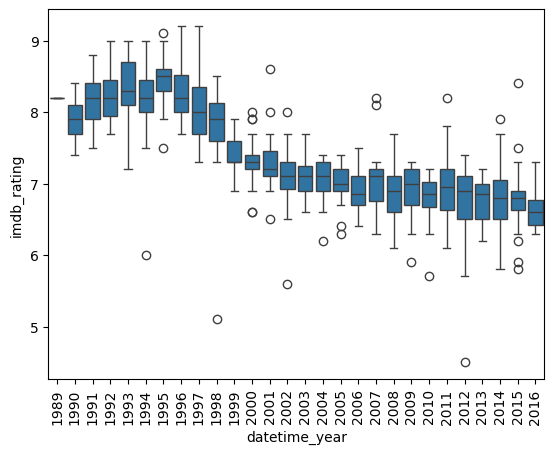

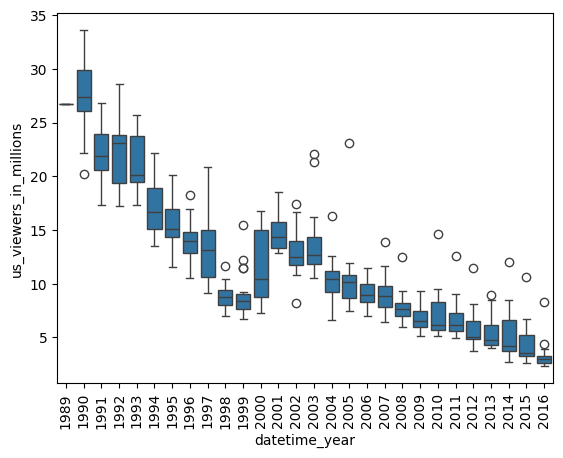

In [11]:
# boxplot
sns.boxplot(data=episodes,x=episodes['datetime_year'],y=episodes['imdb_rating'])
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=episodes,x=episodes['datetime_year'],y=episodes['us_viewers_in_millions'])
plt.xticks(rotation=90)
plt.show()

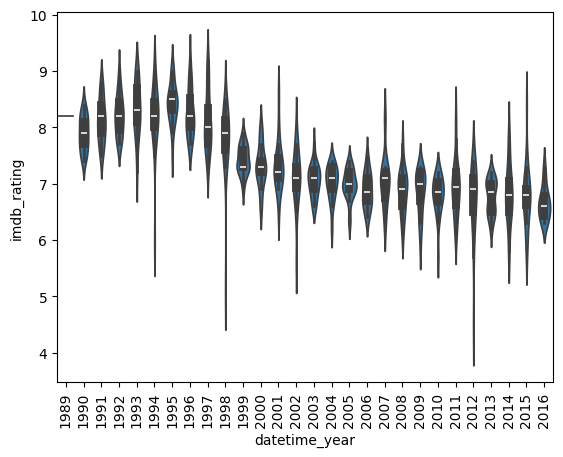

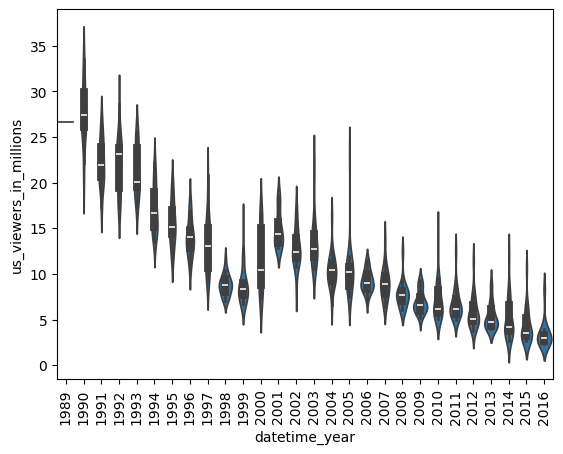

In [12]:
# violinplot
sns.violinplot(data=episodes,x=episodes['datetime_year'],y=episodes['imdb_rating'])
plt.xticks(rotation=90)
plt.show()
sns.violinplot(data=episodes,x=episodes['datetime_year'],y=episodes['us_viewers_in_millions'])
plt.xticks(rotation=90)
plt.show()

# 2. Vježbe: Izrada naprednijih vizualizacija

Da bismo napravili dobru vizualizaciju podataka, prvo trebamo imati jasnu ideju o tome što želimo vizualizirati! Objedinjujemo li podatke i kako? Koja bi količina trebala biti na različitim osima? Kako koristiti boje i veličine predmeta? Često pomaže ručno skicirati vizualizaciju prije nego što je kodirate.

U sljedećoj vježbi dobit ćete opise vizualizacija koje bi mogle biti korisne za razumijevanje skupa podataka o filmovima.

## 2.1 Heatmape

- Vizualizirajte IMDB i US views kroz sezone te koristite funkciju Seaborn heatmap te funkciju *pivot* of pandasa

- Konačno, heatmapom možemo predstaviti tri varijable, kodiranjem treće varijable bojom. Pokažite kako sa sezonom opada IMDB ocjena i US views korištenjem heatmape


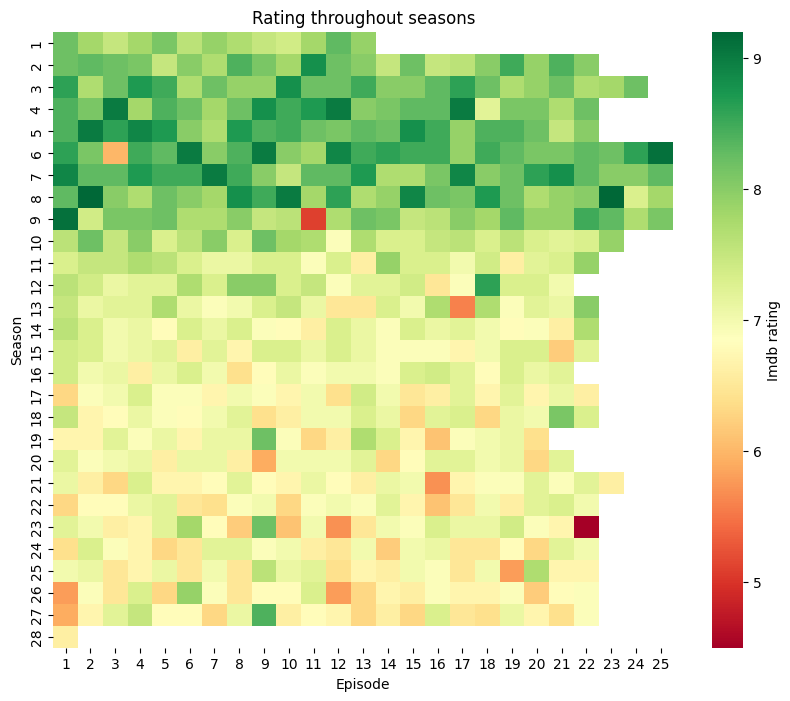

In [13]:
# Napišite svoj kod ovdje da biste kreirali prvu heatmapu
heatmap_data = episodes.pivot_table(index='season', columns='number_in_season', values='imdb_rating',aggfunc='mean', fill_value=np.nan)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='RdYlGn', cbar_kws={'label': 'Imdb rating'})  

plt.title('Rating throughout seasons')
plt.xlabel('Episode')
plt.ylabel('Season')

plt.show()

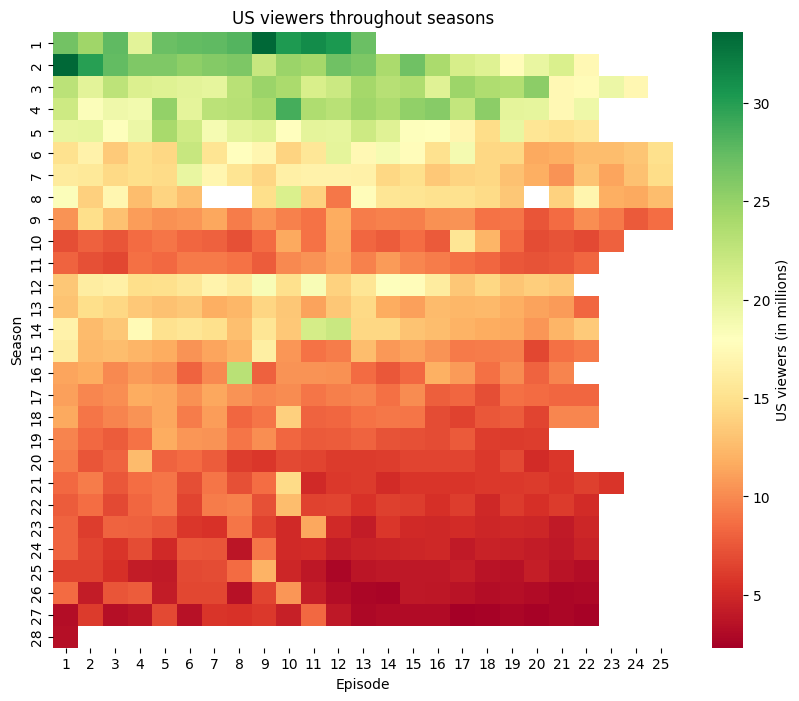

In [14]:
# Napišite svoj kod ovdje da biste kreirali drugu heatmapu
heatmap_data = episodes.pivot_table(index='season', columns='number_in_season', values='us_viewers_in_millions',aggfunc='mean', fill_value=np.nan)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='RdYlGn', cbar_kws={'label': 'US viewers (in millions)'})  

plt.title('US viewers throughout seasons')
plt.xlabel('Episode')
plt.ylabel('Season')

plt.show()